<a href="https://colab.research.google.com/github/talaabusoud/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Tala AbuSoud




## Project Overview
### Project 1

### Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

### Part 2:

We will continue to work off of the GitHub repository we created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link in the learn platform.
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

### Part 3:
The task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

* Histograms to view the distributions of numerical features in your dataset.

* Boxplots to view statistical summaries of numerical features in your dataset.
* Countplots to view the frequency of each class of categorial features in your dataset.
* Heatmap to view the correlation between features.

Start updating the README file associated with the project.

* Add text describing the project.
* Select two key visuals of different types that demonstrate a relevant insight into the data. Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

* Link to the original dataset on Kaggle

  https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

### Data Dictionary

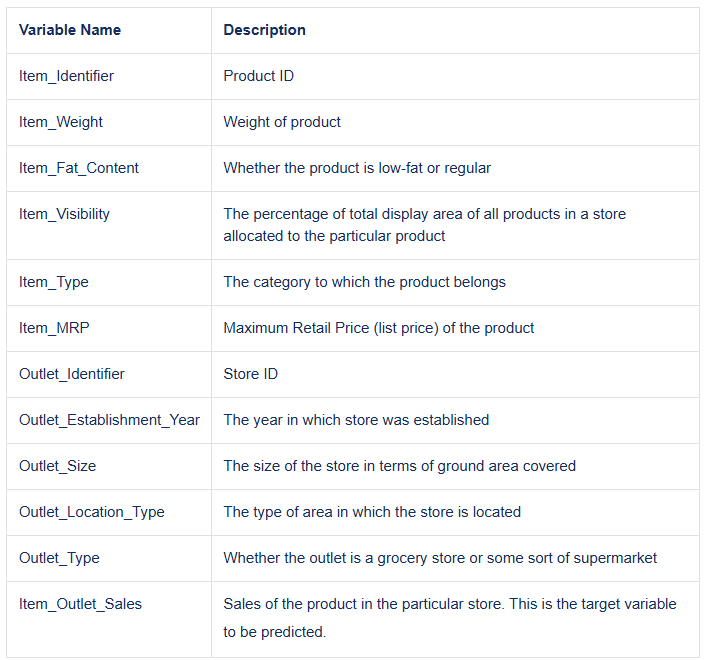

### Part 4:
The task in Part 4 is to **inspect the features**.  
We want to be fully aware of any **null values** so we can make informed choices for machine learning in the next course.

**Before you proceed:**

- **Remove the placeholders you added in week 2 and replace them with null values.**

This will allow our functions to detect and report missing data during EDA.

---

#### For Each Feature:
* Add a new markdown header.
* Paste the feature's definition from the data dictionary into a markdown cell.
* Create a univariate visualization showing the distribution of values/categories.
  * You may use the EDA functions from the previous lessons or create your own visualizations.

* Answer the following questions from the Feature Inspection lesson in a markdown cell:
  * What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * Is the feature constant or quasi-constant?
  * What is the cardinality? Is it high (>10)?
  * Would we know this feature before the target is determined?
  * Is there a business case/understanding reason to exclude based on our business case?

* Create a multivariate visualization plotting each feature vs. the target.
  * You may use the EDA functions from the previous lessons or create your own visualizations.

* Answer the following questions from the Feature Inspection lesson in a Markdown cell:
  * Based on your business understanding, would you expect this feature to be a predictor of the target?
  * Does this feature appear to be a predictor of the target?

### Part 5:
 In Part 5, we will revisit the original, uncleaned sales prediction dataset to avoid data leakage.

You should load a fresh version of [the original data set](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing) here using pd.read_csv() and start your cleaning process to ensure no data leakage!

* Before splitting your data, it's important to deal with duplicates and inconsistent categorical data. You should identify the features (X) and target (y), with "Item_Outlet_Sales" designated as your target and the other relevant variables as your features. We suggest dropping the "Item_Identifier" feature due to its high cardinality. Then, perform a train-test split. After the split, create a preprocessing object to prepare the dataset for machine learning. Remember that imputation of missing values should occur after the train-test split using SimpleImputer.

## Load and Inspect Data

### imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

1) How many rows and columns?

In [4]:
df.shape

(8523, 12)

2) What are the datatypes of each variable?

In [5]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


3) Are there duplicates? If so, drop any duplicates.

In [6]:
df.duplicated().sum()

np.int64(0)

there is no duplicates

4) Identify missing values.

In [7]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [8]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [9]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

5) Address the missing values by using a placeholder value.

In [10]:
# fill Item_Weight with mean
# df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
# # fill Outlet_Size with mode (most frequent category)
# df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

# Fill nulls in Item_Weight with the mean value of the corresponding Item_Type
# df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(
#     lambda x: x.fillna(x.mean())
# )

In [11]:
# Function to fill nulls with mode per group
def fill_outlet_size(group):
    mode = group.mode()
    if not mode.empty:
        return group.fillna(mode[0])
    else:
        return group

# Apply mode imputation grouped by Outlet_Type
# df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(fill_outlet_size)

6) Confirm that there are no missing values after addressing them.

In [12]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [13]:
df.select_dtypes(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [14]:
for col in df.select_dtypes(include='object').columns:
  print(f'{col}\n', df[col].unique(), '\n')

Item_Identifier
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

Item_Fat_Content
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

Item_Type
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Identifier
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

Outlet_Size
 ['Medium' nan 'High' 'Small'] 

Outlet_Location_Type
 ['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet_Type
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [16]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols.agg(['min', 'max', 'mean'])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914


## Exploratory Data Analysis

* Histograms to view the distributions of numerical features in the dataset.

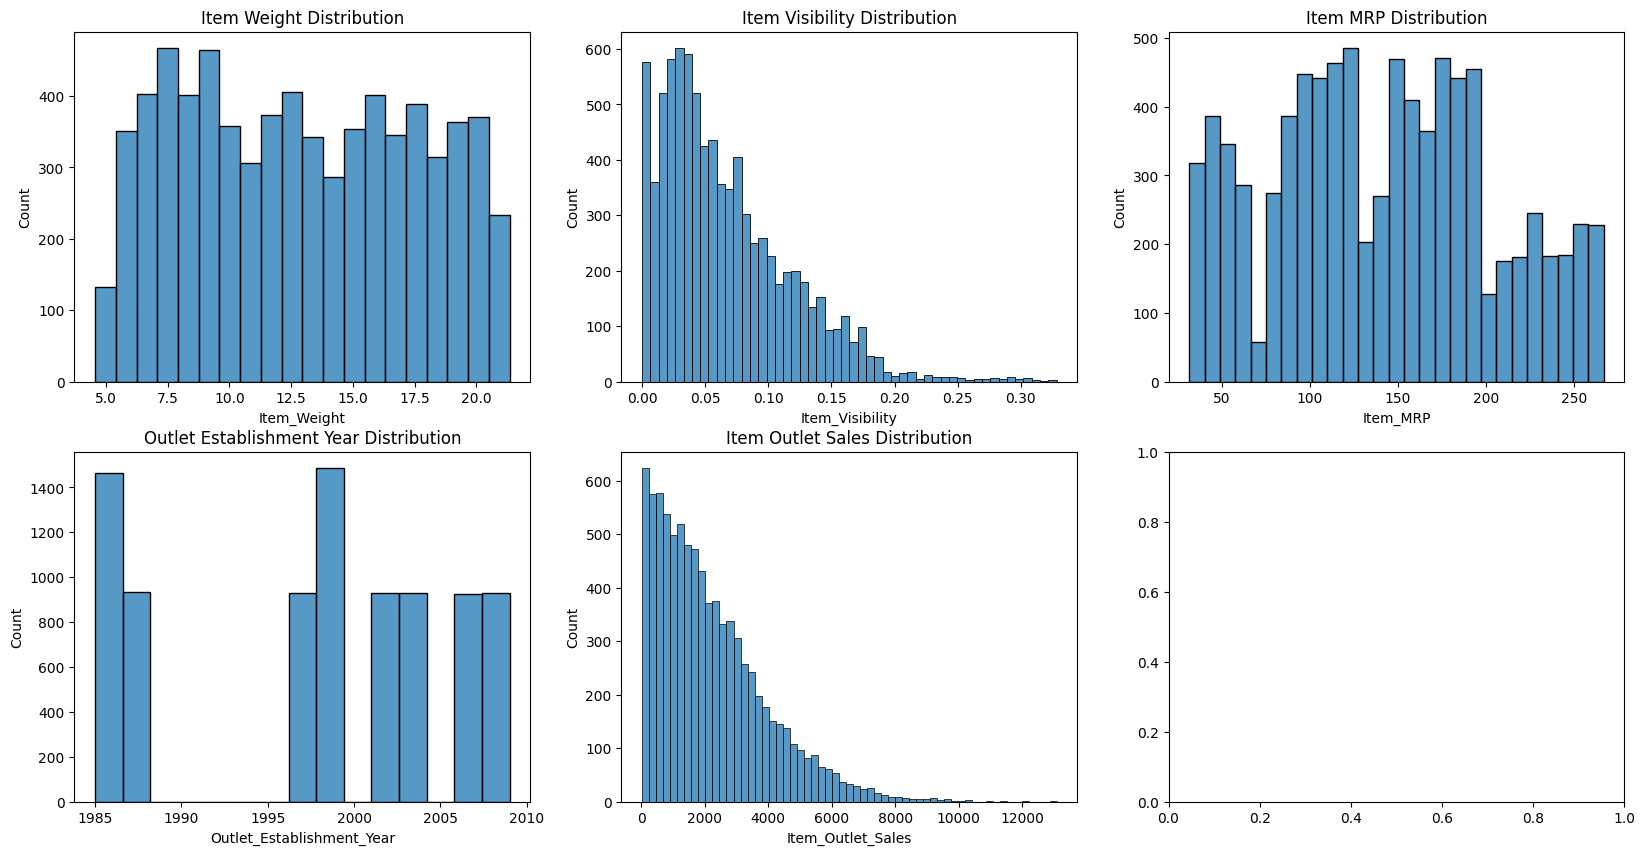

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.histplot(data=df, x="Item_Weight", ax=ax[0,0])
ax[0,0].set_title("Item Weight Distribution");

sns.histplot(data=df, x="Item_Visibility", ax=ax[0,1])
ax[0,1].set_title("Item Visibility Distribution");

sns.histplot(data=df, x="Item_MRP", ax=ax[0,2])
ax[0,2].set_title("Item MRP Distribution");

sns.histplot(data=df, x="Outlet_Establishment_Year", ax=ax[1,0])
ax[1,0].set_title("Outlet Establishment Year Distribution");

sns.histplot(data=df, x="Item_Outlet_Sales", ax=ax[1,1])
ax[1,1].set_title("Item Outlet Sales Distribution");

- **Item Weight Distribution**: Item weights are fairly uniformly distributed with a noticeable peak around 13–14 units.
- **Item Visibility Distribution**: Most items have low visibility, with a right-skewed distribution.
- **Item MRP Distribution**: The item Maximum Retail Price is multimodal and spread across a wide range.
- **Outlet Establishment Year Distribution**: Outlet establishment years are concentrated in a few specific years, notably 1985 and 1999.
- **Item Outlet Sales Distribution**: Sales are right-skewed, with most items having low to moderate sales and few items with very high sales.
---

* Boxplots to view statistical summaries of numerical features in the dataset.


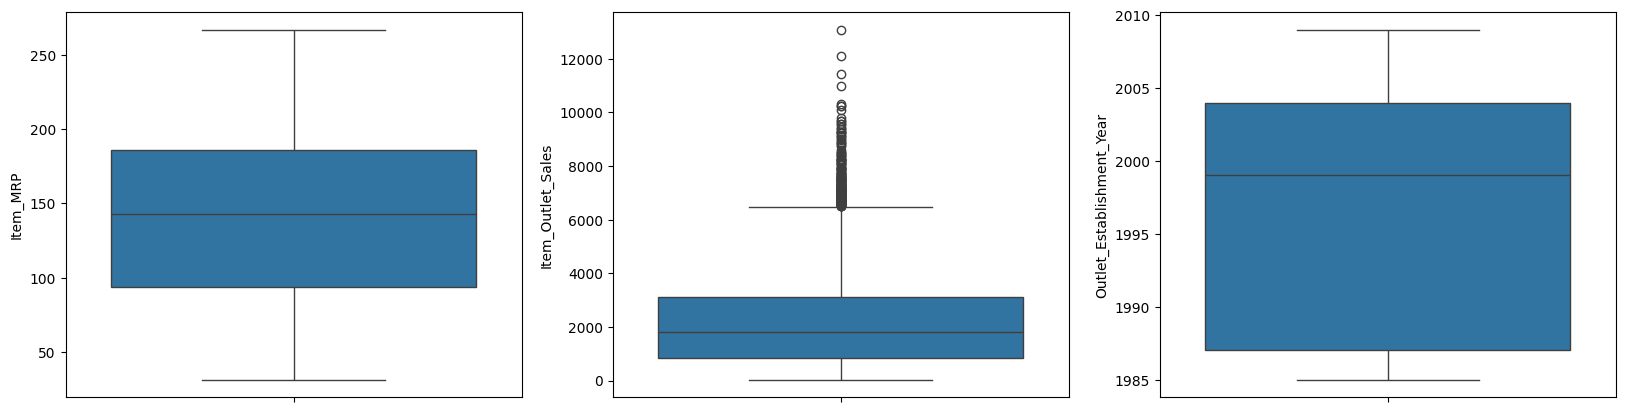

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data = df['Item_MRP'], ax = ax[0] );
sns.boxplot(data = df['Item_Outlet_Sales'], ax = ax[1] );
sns.boxplot(data = df['Outlet_Establishment_Year'], ax = ax[2]);

 - **Item_MRP:** Item prices are fairly symmetrically distributed with a mean 140 nearly.

- **Item_Outlet_Sales:** Sales are highly right-skewed with many high-value outliers beyond the upper whisker.

- **Outlet_Establishment_Year:** Establishment years are spread across a few discrete years with no outliers, indicating categorical-like distribution.

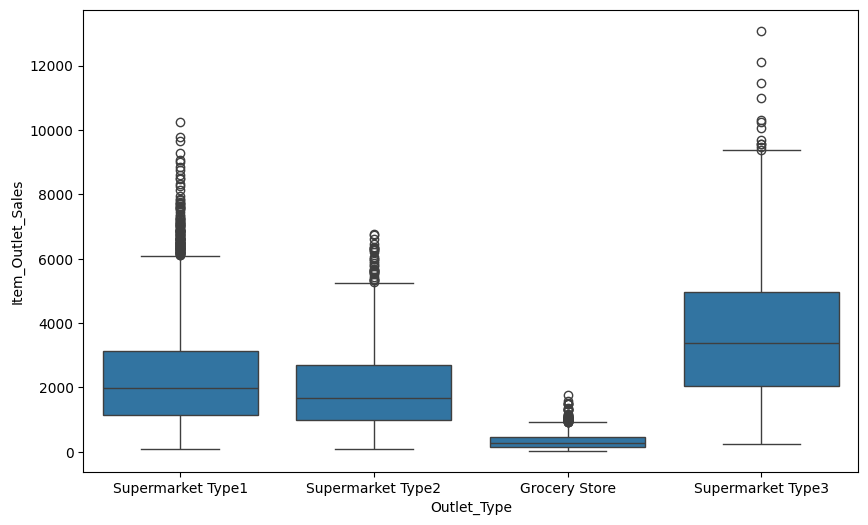

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df);

This box plot shows that Supermarket Type3 has the highest median and overall sales, while Grocery Store has the lowest sales with the least variation. Supermarket Type1 and Type2 have similar sales ranges, but Type1 has more high-value outliers.

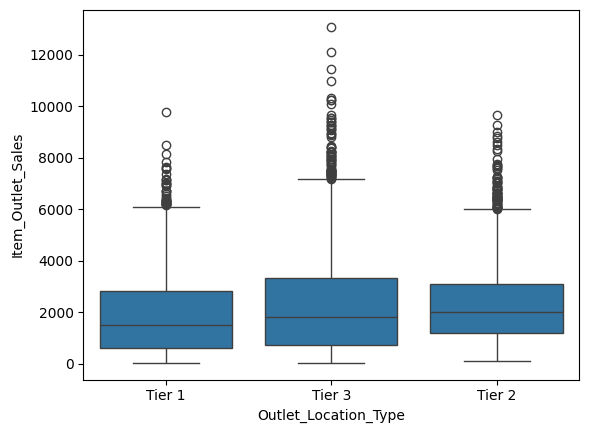

In [21]:
# Sales distribution across outlet locations
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df);

This box plot shows that Tier 3 locations have the highest median and wider distribution of sales, suggesting they perform slightly better overall. Tier 1 and Tier 2 have similar distributions, but Tier 2 has a slightly lower median, and all tiers show a significant number of high-value outliers.

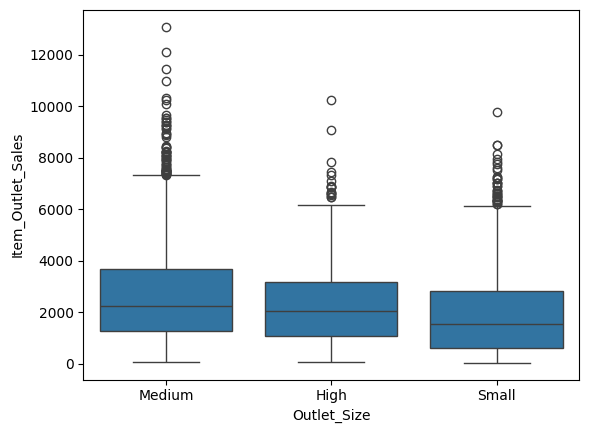

In [22]:
# Sales distribution by outlet size
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df);

This box plot shows that Medium and High outlet sizes have slightly higher median sales compared to Small outlets, but overall, the distributions and spreads are quite similar. The overlap suggests that Outlet_Size has little to no strong impact on Item_Outlet_Sales.








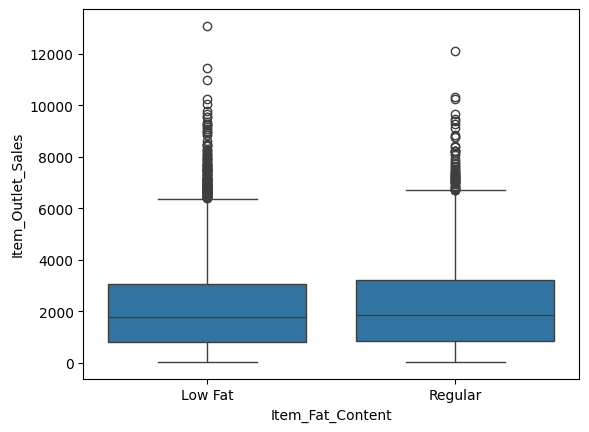

In [23]:
# Sales distribution by item fat content
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df);

This box plot shows that Item_Outlet_Sales are very similar for both Low Fat and Regular fat content items, with nearly identical medians, spreads, and outliers — indicating little to no impact of Item_Fat_Content on sales.

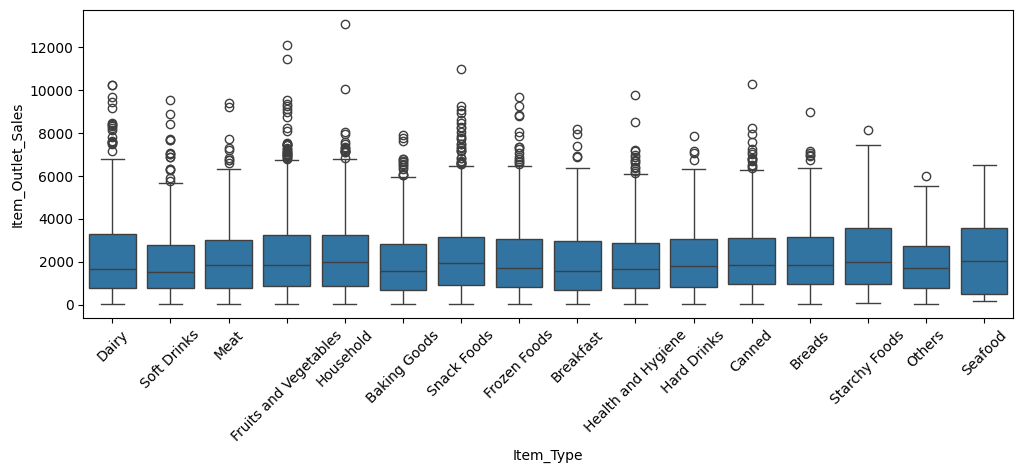

In [24]:
# Sales distribution by item type
plt.figure(figsize=(12, 4))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=45);

This box plot shows that Item_Outlet_Sales vary modestly across different item types, with starchy foods and seafood showing slightly higher median sales, while canned and others have lower medians. However, the overall spread and distribution are quite similar, indicating that Item_Type may have only a limited impact on sales.

---

* Countplots to view the frequency of each class of categorial features in the dataset.

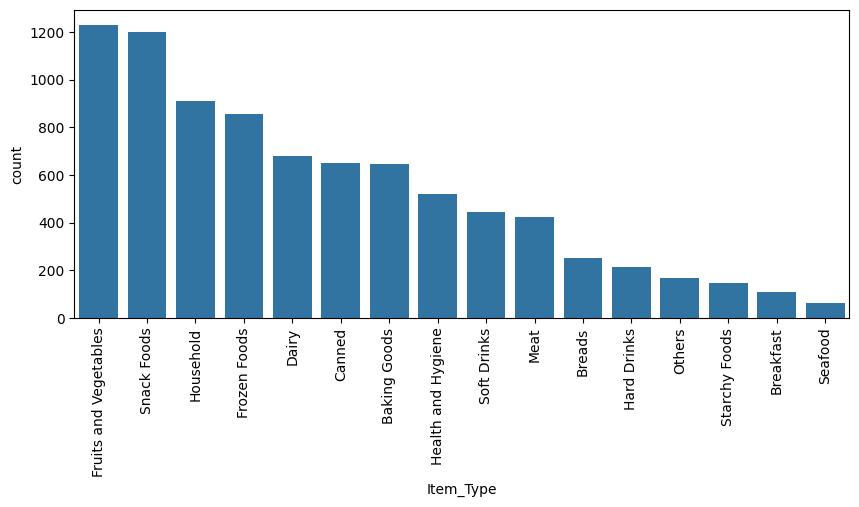

In [25]:
plt.figure(figsize=(10,4))
order = df['Item_Type'].value_counts().index
ax = sns.countplot(data=df, x='Item_Type', order=order)
plt.xticks(rotation=90);

Fruits & Vegetables and Snack Foods are the most frequently sold item types, while Seafood and Breakfast are the least represented in the dataset.

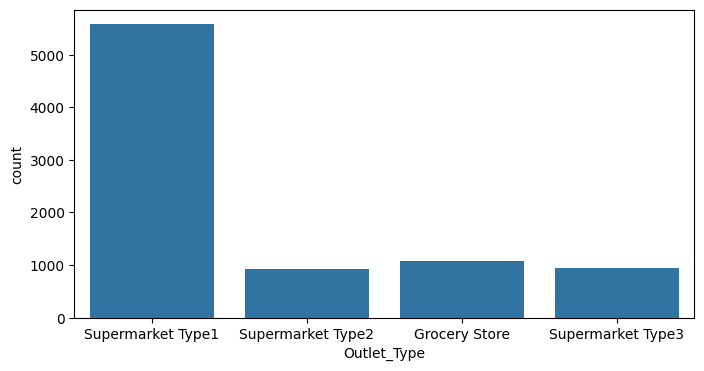

In [26]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='Outlet_Type')

Supermarket Type1 dominates the dataset with far more entries than other outlet types, suggesting a class imbalance.

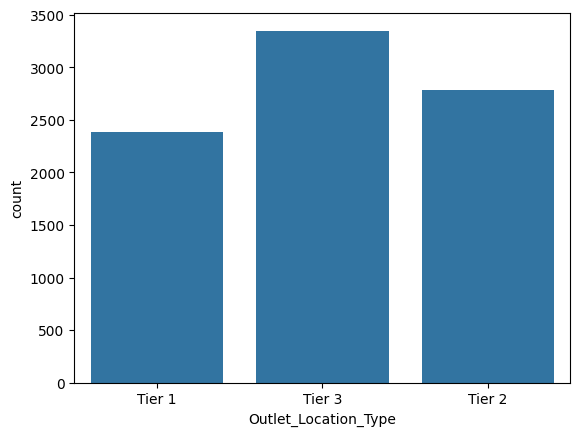

In [27]:
ax = sns.countplot(data=df, x='Outlet_Location_Type')

Tier 3 locations have the highest outlet count, followed by Tier 2 and Tier 1, indicating more data is concentrated in urban or densely populated areas.

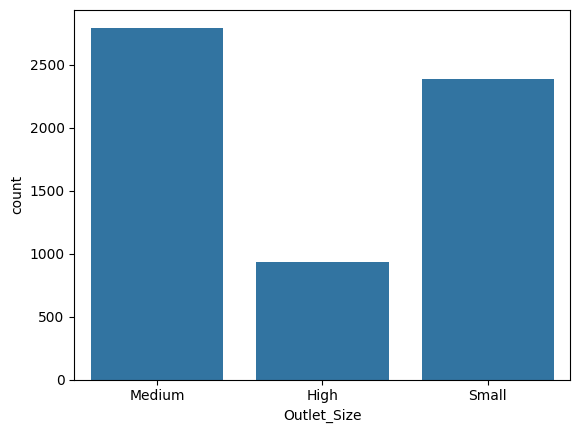

In [28]:
ax = sns.countplot(data=df, x='Outlet_Size')

Small-sized outlets are the most common in the dataset, while high-sized outlets are relatively rare, which may impact model generalization.

---
* Heatmap to view the correlation between features.

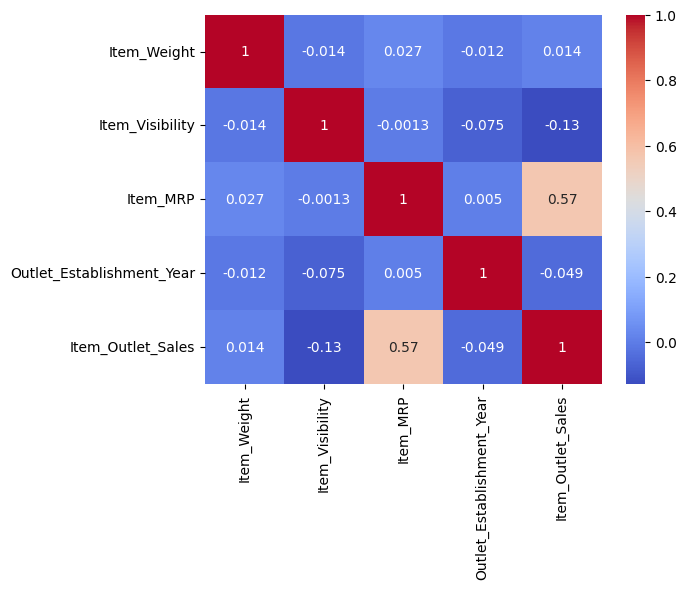

In [29]:
corr = df.corr(numeric_only = True)
ax = sns.heatmap(corr, cmap = 'coolwarm', annot = True);

- The only feature with a **strong positive correlation to Item_Outlet_Sales is Item_MRP** (r = 0.57), suggesting that higher-priced items tend to have higher sales.

- All other features (Item_Weight, Outlet_Establishment_Year) show very weak or no correlation with sales, indicating they may not be useful predictors on their own.

## Feature Inspection


I commented out the part related to replacing the null values in Part 2 so I can continue working on this part.

In [30]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


### EDA Functions

In [31]:
# EDA Function 1
# categorical
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',figsize = (6,4), order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

################################
# EDA Function 2
# plot_categorical_vs_target
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6, linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax


#######################################
# EDA Function 3
# Univariate: explore_numeric:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

# Multivariate: plot_numeric_vs_target:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function
def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

## Feature: Item_Weight

**Definition**: Weight of the product.

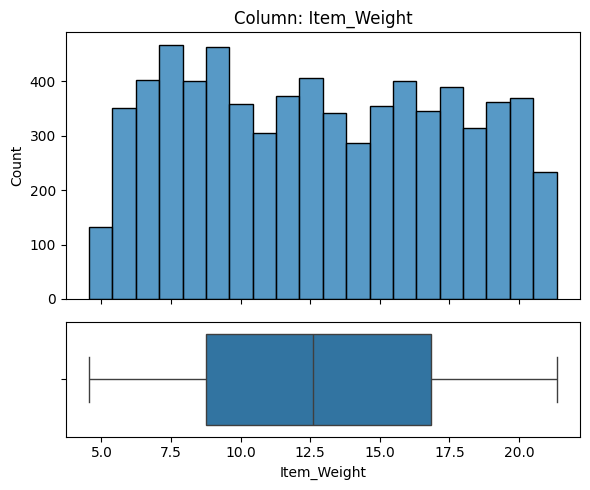

- NaN's Found: 1463 (17.17%)


In [32]:
explore_numeric(df, 'Item_Weight')

In [33]:
df['Item_Weight'].nunique()

415

- **What type of feature is it?**

  Numeric



- **How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**

    Null values: 1,463

    Percentage: 17.17%

    What to do? Since its important feature, we could impute using the mean per Item_Type.


- **Is the feature constant or quasi-constant?**

    not a constant or quasi-constant feature.

- **What is the cardinality? Is it high (>10)?**

    Yes, this feature has high cardinality

- **Would we know this feature before the target is determined?**
    
    Yes, the weight of a product is known beforehand, so it's valid to use for prediction.


- **Is there a business case/understanding reason to exclude based on our business case?**

    `Item_Weight` represents the product's weight, a basic property likely relevant to predicting `Item_Outlet_Sales`, so it should be kept

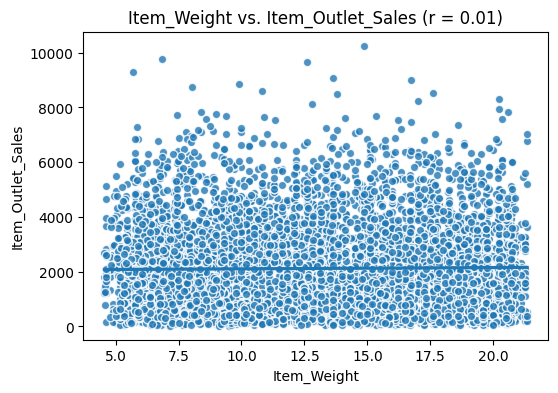

In [34]:
plot_numeric_vs_target(df, x='Item_Weight', y='Item_Outlet_Sales');

- **Based on your business understanding, would you expect this feature to be a predictor of the target?**
    Possibly. According to the data dictionary, Item_Weight is the weight of the product. Heavier products might affect shelf space, cost, or customer preference, so you might expect it to have some influence on sales.


- **Does this feature appear to be a predictor of the target?**

    No. Based on the scatterplot and correlation value (r = 0.01), there is no significant linear relationship between `Item_Weight` and `Item_Outlet_Sales`. Therefore, it does not appear to be a strong predictor of the target variable.

---
## Feature: Item_Fat_Content

**Definition**: Whether the product is low-fat or regular.

/tmp/ipython-input-31-4038676734.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


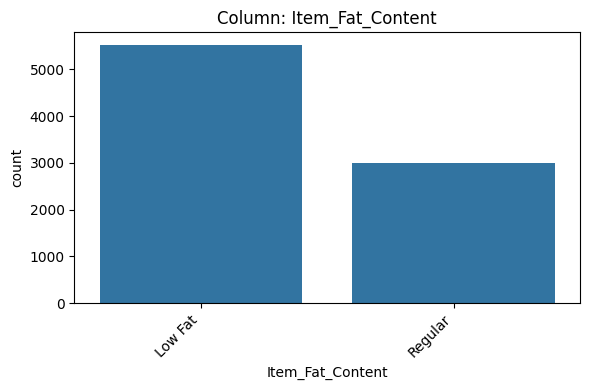

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [35]:
explore_categorical(df, 'Item_Fat_Content', fillna=False);

**Type**: Categorical (nominal)  

**Null values**: Count: 0, Percentage: 0.0%   

**Constant/quasi-constant?** No. The most common value is 'Low Fat' at 64.73%, which is well below the 98% threshold.

**Cardinality**: 2 unique values → *Low cardinality*

**Known before target?** Yes, the fat content is known before sales happen.

**Exclude for business reason?** No, it’s a relevant property of the item.

/tmp/ipython-input-31-4038676734.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


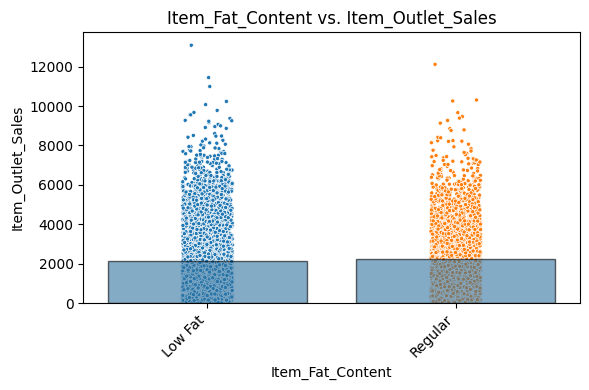

In [36]:
plot_categorical_vs_target(df, x='Item_Fat_Content', y='Item_Outlet_Sales', fillna=False);

**Based on your business understanding, would you expect this feature to be a predictor of the target?**  
Yes. Since `Item_Fat_Content` describes whether the product is low-fat or regular, it might influence consumer preference and purchasing decisions, potentially affecting sales.

**Does this feature appear to be a predictor of the target?**  
Not strongly. The average sales (bar height) appear similar across both categories. The scatter distribution overlaps significantly between `Low Fat` and `Regular`.  

---
## Feature: Item_Visibility

**Definition**: The percentage of total display area of all products in a store allocated to the particular product.

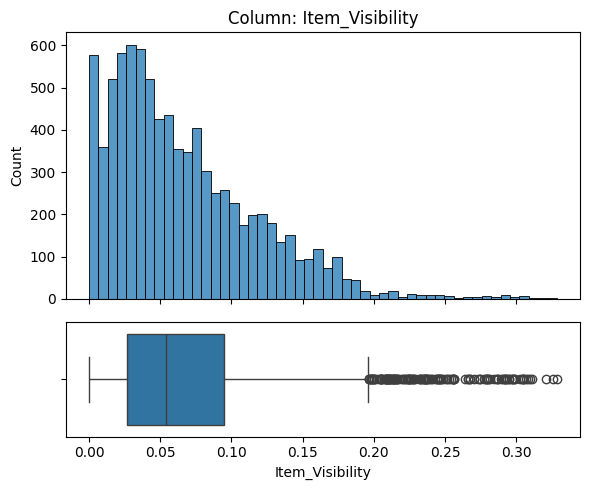

- NaN's Found: 0 (0.0%)


In [37]:
explore_numeric(df, 'Item_Visibility')

**Type**: Numeric  

**Null values**: Count: 0, Percentage: 0.0%  

**Constant/quasi-constant?** not a constant or quasi-constant feature.

**Cardinality**: Cardinality is high.

**Would we know this feature before the target is determined?** Yes. Display area is assigned to a product before sales happen.

**Exclude based on business logic?** No. The amount of display space can impact how much a product is seen by customers, and is likely relevant to sales.


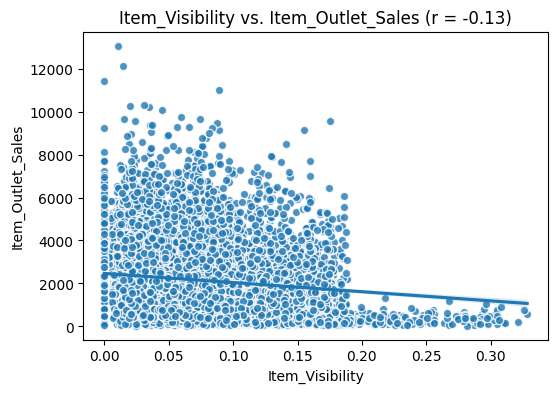

In [39]:
plot_numeric_vs_target(df, x='Item_Visibility', y='Item_Outlet_Sales');

**Based on your business understanding, would you expect this feature to be a predictor of the target?**  
Yes. Products that are more visible might logically be more likely to attract customer attention and sell more.

**Does this feature appear to be a predictor of the target?**  
Slightly. The scatterplot shows a weak negative relationship with `Item_Outlet_Sales` (`r = -0.13`).  

---
## Feature: Item_Type

**Definition**: The category to which the product belongs.

/tmp/ipython-input-31-4038676734.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


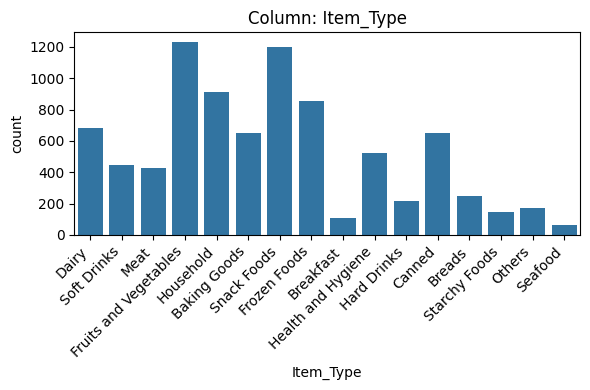

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [41]:
explore_categorical(df, 'Item_Type', fillna=False);

**Type**: Categorical (nominal)

**Null values**: Count: 0, Percentage: 0.0%

**Constant/quasi-constant?** Not constant or quasi-constant

**Cardinality**: 16 unique values → This is considered high cardinality.  

**Would we know this feature before the target is determined?** Yes. The type of product is known ahead of any sales.

**Is there a business case/understanding reason to exclude based on our business case?** No. Product category is a very important factor in sales.

/tmp/ipython-input-31-4038676734.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


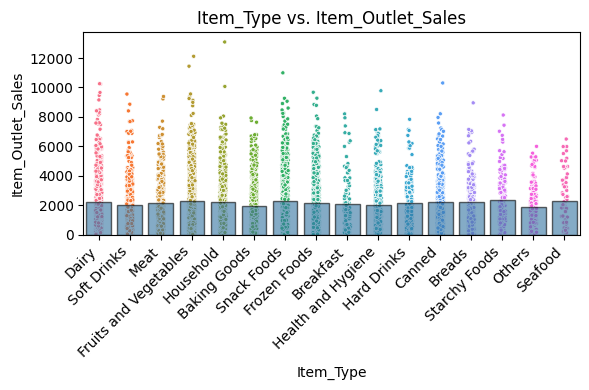

In [42]:
plot_categorical_vs_target(df, x='Item_Type', y='Item_Outlet_Sales', fillna=False);

**Based on your business understanding, would you expect this feature to be a predictor of the target?**  
Yes, different types of items can impact sales in different ways. For example, snacks and drinks often sell more quickly than products like household supplies.

**Does this feature appear to be a predictor of the target?**  
Possibly. Some item types like Health and Hygiene, Household, or Snack Foods show slightly different average sales, but the differences aren’t very large. There’s quite a bit of overlap between categories, so while this feature might help a little in predicting sales, it’s probably not a strong predictor on its own.

---
## Feature: Item_MRP

**Definition**: Maximum Retail Price (list price) of the product.

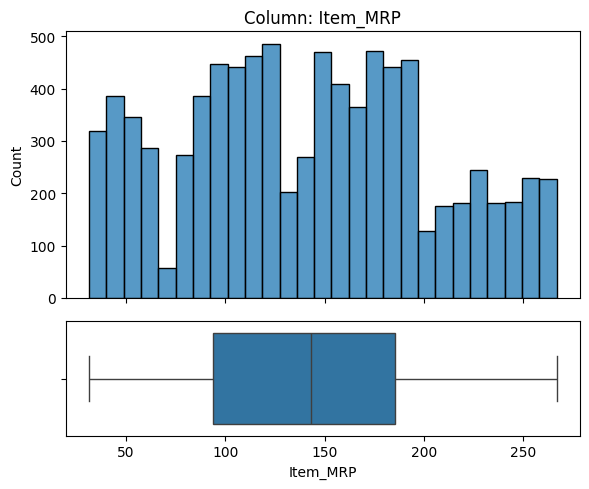

- NaN's Found: 0 (0.0%)


In [43]:
explore_numeric(df, 'Item_MRP')

**Type**: Numeric

**Null values**: Count: 0, Percentage: 0.0%  

**Constant/quasi-constant?** not constant or quasi-constant.

**Cardinality**: High cardinality.

**Would we know this feature before the target is determined?** Yes, it's known before any sales occur.

**Is there a business case/understanding reason to exclude based on our business case?**  No.

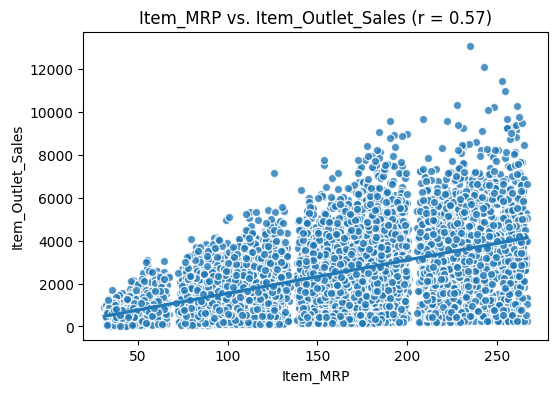

In [45]:
plot_numeric_vs_target(df, x='Item_MRP', y='Item_Outlet_Sales');

**Based on your business understanding, would you expect this feature to be a predictor of the target?**  
Yes. The price of a product often influences how much revenue it generates. Higher priced items can lead to higher individual sales amounts, while lower priced items may sell in larger quantities. Either way, price is a key driver of sales.

**Does this feature appear to be a predictor of the target?**  
Yes. The scatterplot shows a clear positive relation, and the correlation value is (r = 0.57), which means a moderately strong relationship. This suggests that `Item_MRP` is likely to be one of the most predictive features in the dataset.

---
## Feature: Outlet_Establishment_Year

**Definition**: The year in which the store was established.


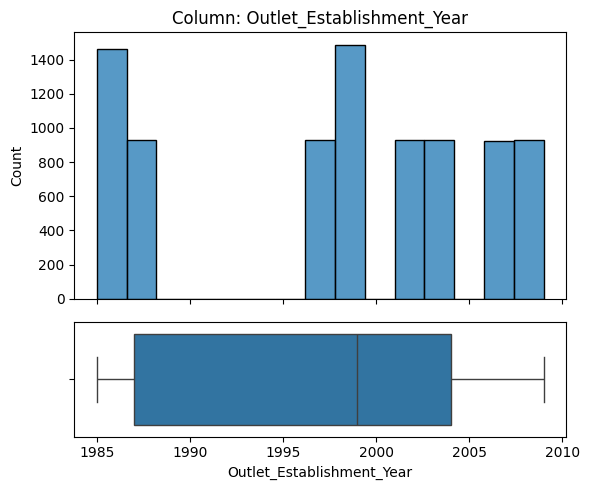

- NaN's Found: 0 (0.0%)


In [58]:
explore_numeric(df, 'Outlet_Establishment_Year')

**Type**: Numeric (discrete)

**Null values**: Count: 0, Percentage: 0.0%

**Constant/quasi-constant?**  
- No. Multiple unique values are well distributed across time.

**Cardinality**:  
- Moderate, this can be treated as either numeric or categorical.

**Would we know this feature before the target is determined?**  
- Yes. The establishment year is a known and fixed store characteristic.

**Exclude based on business logic?**  
- No. Older stores might have more loyal customers or established supply chains, while newer ones might be less known. This could influence sales and is worth keeping.

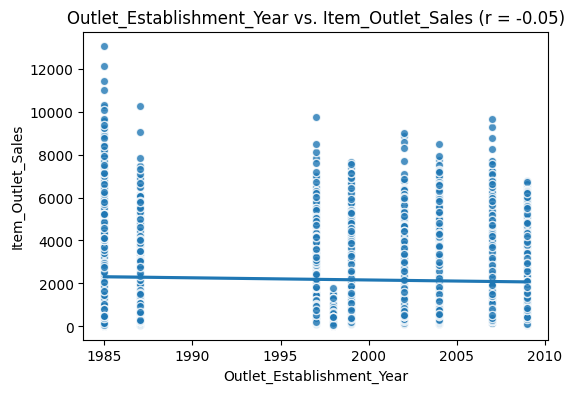

In [59]:
plot_numeric_vs_target(df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales');

While `Outlet_Establishment_Year` could have theoretical value, the data indicates it is not a meaningful standalone predictor of sales. However, it might still add value when combined with other features (e.g., outlet type or location).

---
## Feature: Outlet_Size

**Definition**: The size of the store in terms of ground area covered.


/tmp/ipython-input-31-4038676734.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


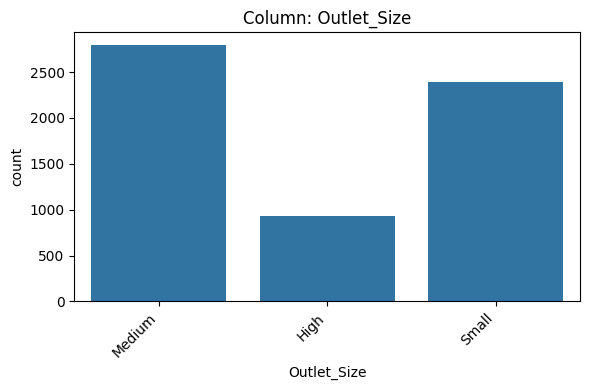

- NaN's Found: 2410 (28.28%)
- Unique Values: 3
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [47]:
explore_categorical(df, 'Outlet_Size', fillna=False);

**Type**: Categorical (ordinal)

**Null values**:  
- Count: 2,410  
- Percentage: 28.28%  
- The nulls should be handled by imputing values based on similar outlets, for example, using `Outlet_Type` or `Outlet_Identifier`.

**Constant/quasi-constant?**  
- Not constant or quasi-constant.

**Cardinality**:  
- 3 unique values → Low cardinality.

**Would we know this feature before the target is determined?**  
- Yes. Store size is fixed and known.

**Is there a business case/understanding reason to exclude based on our business case?**  
- No. Store size may impact foot traffic and shelf space, which can affect sales.


/tmp/ipython-input-31-4038676734.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


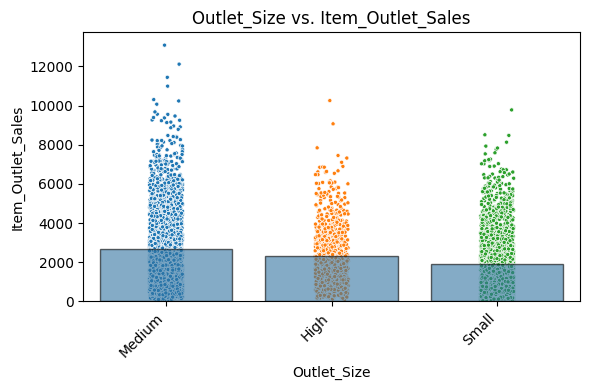

In [49]:
plot_categorical_vs_target(df, x='Outlet_Size', y='Item_Outlet_Sales', fillna=False);

**Based on your business understanding, would you expect this feature to be a predictor of the target?**  
Yes. Store size can influence things like product availability, number of customers, and how much stock can be displayed.

**Does this feature appear to be a predictor of the target?**  
The average sales for 'Medium' size outlets appear slightly higher than for 'Small' and 'High', but the difference is not large.  
However, since over 28% of `Outlet_Size` values are missing, this analysis is based on incomplete data and may not fully reflect the true relationship.  
After imputing the missing values we could draw a strong conclusions.

---
## Feature: Outlet_Location_Type

**Definition**: The type of area in which the store is located.


/tmp/ipython-input-31-4038676734.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


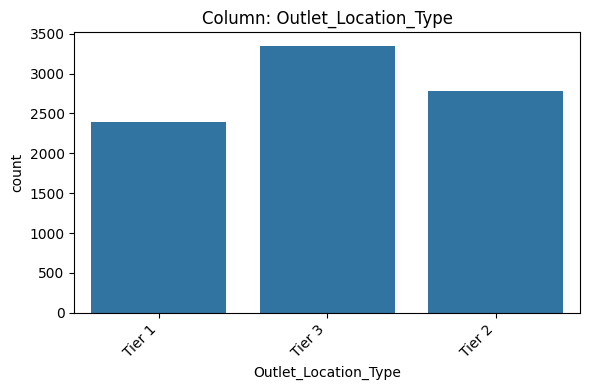

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [50]:
explore_categorical(df, 'Outlet_Location_Type', fillna=False);

**Type**: Categorical (ordinal)

**Null values**: Count: 0, Percentage: 0.0%  

**Constant/quasi-constant?**  
- Not constant or quasi-constant.

**Cardinality**:  
- 3 unique values → Low cardinality.

**Would we know this feature before the target is determined?**  
- Yes. The location type is known before analyzing sales.

**Is there a business case/understanding reason to exclude based on our business case?**  
- No. Location type may affect customer behavior, traffic, and availability.

/tmp/ipython-input-31-4038676734.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


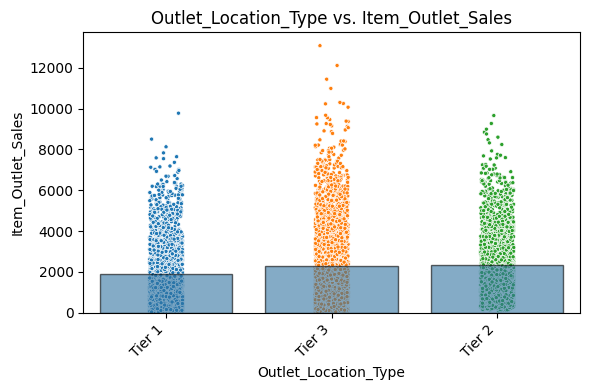

In [52]:
plot_categorical_vs_target(df, x='Outlet_Location_Type', y='Item_Outlet_Sales', fillna=False);

**Based on your business understanding, would you expect this feature to be a predictor of the target?**  
Yes. The store’s location type can affect customer behavior, purchasing power, and foot traffic.

**Does this feature appear to be a predictor of the target?**  
It looks like outlets in Tier 3 areas might have slightly higher average sales compared to Tier 1 and Tier 2, but the difference isn’t very big. Since there’s a lot of overlap in sales between the three tiers, this feature might help a little, but it probably won’t be a strong predictor on its own.

---
## Feature: Outlet_Type

**Definition**: Whether the outlet is a grocery store or some sort of supermarket.

/tmp/ipython-input-31-4038676734.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


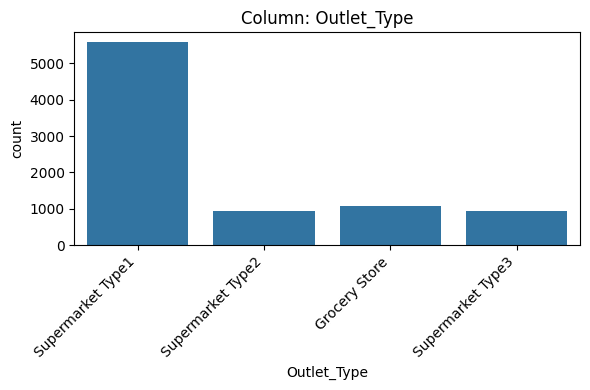

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [56]:
explore_categorical(df, 'Outlet_Type', fillna=False);

**Type**: Categorical (nominal)

**Null values**: Count: 0, Percentage: 0.0%  

**Constant/quasi-constant?**  
- Not constant or quasi-constant.

**Cardinality**:  
- 4 unique values → Low cardinality.

**Would we know this feature before the target is determined?**  
- Yes. The type of outlet is known in advance.

**Exclude based on business logic?**  
- No. The type of store can significantly affect pricing, and customer traffic.

/tmp/ipython-input-31-4038676734.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


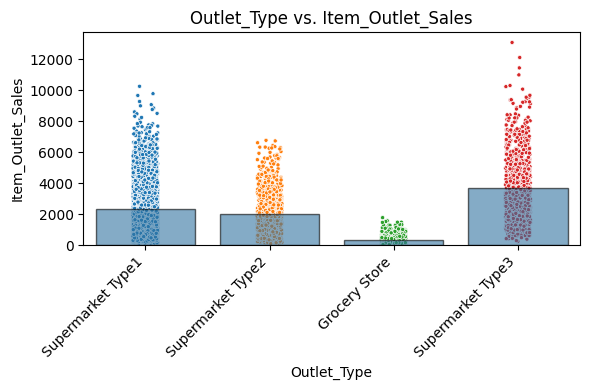

In [57]:
plot_categorical_vs_target(df, x='Outlet_Type', y='Item_Outlet_Sales', fillna=False);

**Based on your business understanding, would you expect this feature to be a predictor of the target?**  
Yes. The type of outlet likely influences the variety of products, customer base, and sales volume.

**Does this feature appear to be a predictor of the target?**  
Yes. The average sales clearly vary across outlet types. For example, `Supermarket Type 3` shows noticeably higher average sales than others, while `Grocery Store` shows much lower sales.  

---
## Part 5: Preprocesing for Machine Learning

In [78]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [79]:
fpath = "/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/02-IntroML/Week05/Data/sales_predictions_2023.csv"
df2 = pd.read_csv(fpath)

In [80]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
df2.duplicated().sum()

np.int64(0)

In [82]:
df2.select_dtypes(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [83]:
for col in df2.select_dtypes(include='object').columns:
  print(f'{col}\n', df2[col].unique(), '\n')

Item_Identifier
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

Item_Fat_Content
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

Item_Type
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Identifier
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

Outlet_Size
 ['Medium' nan 'High' 'Small'] 

Outlet_Location_Type
 ['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet_Type
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



In [84]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})
df2['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [85]:
df2 = df2.drop(columns=["Item_Identifier","Outlet_Identifier"])

In [86]:
df2.dtypes

,0
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object
Outlet_Type,object
Item_Outlet_Sales,float64


In [87]:
numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
df[numeric_cols].describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,7060.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83
std,4.64,0.05,62.28,8.37
min,4.56,0.00,31.29,1985.00
25%,8.77,0.03,93.83,1987.00
50%,12.60,0.05,143.01,1999.00
75%,16.85,0.09,185.64,2004.00
max,21.35,0.33,266.89,2009.00


---
### Define features and target

In [88]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

---
### Train/test split the data

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

---
### Create ColumnTransformer

numarical features:

In [90]:
num_cols = X_train.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [91]:
mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

In [92]:
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [93]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

ordinal features:

In [95]:
ord_cols = ['Outlet_Size']
impute_common = SimpleImputer(strategy='most_frequent')

In [97]:
size_order = ['Small','Medium','High']
ord_encoder = OrdinalEncoder(categories=[size_order])
scaler = StandardScaler()

In [98]:
ord_pipe = make_pipeline(impute_common, ord_encoder, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [99]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

categorical features:

In [100]:
cat_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')

In [101]:
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [102]:
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [103]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

___
#### Instantiate the ColumnTransformer

In [104]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

---
#### Fit the Transformer on Training Data Only

In [105]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

---
#### Transform Training and Test data

In [106]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)

# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,Item_Identifier_DRF01,Item_Identifier_DRF03,Item_Identifier_DRF13,Item_Identifier_DRF15,Item_Identifier_DRF23,Item_Identifier_DRF25,Item_Identifier_DRF27,Item_Identifier_DRF36,Item_Identifier_DRF37,...,Item_Identifier_NCY30,Item_Identifier_NCY41,Item_Identifier_NCY42,Item_Identifier_NCY53,Item_Identifier_NCY54,Item_Identifier_NCZ05,Item_Identifier_NCZ06,Item_Identifier_NCZ17,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,-1.384048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965

In [107]:
X_train_processed.dtypes

,0
Item_Weight,float64
Item_Visibility,float64
Item_MRP,float64
Outlet_Establishment_Year,float64
Outlet_Size,float64
...,...
Outlet_Location_Type_Tier 3,float64
Outlet_Type_Grocery Store,float64
Outlet_Type_Supermarket Type1,float64
Outlet_Type_Supermarket Type2,float64


In [108]:
X_train_processed[num_cols].describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.98,-1.29,-1.77,-1.53
25%,-0.81,-0.76,-0.76,-1.29
50%,0.00,-0.23,0.03,0.14
75%,0.76,0.56,0.72,0.73
max,2.00,5.13,1.99,1.33
